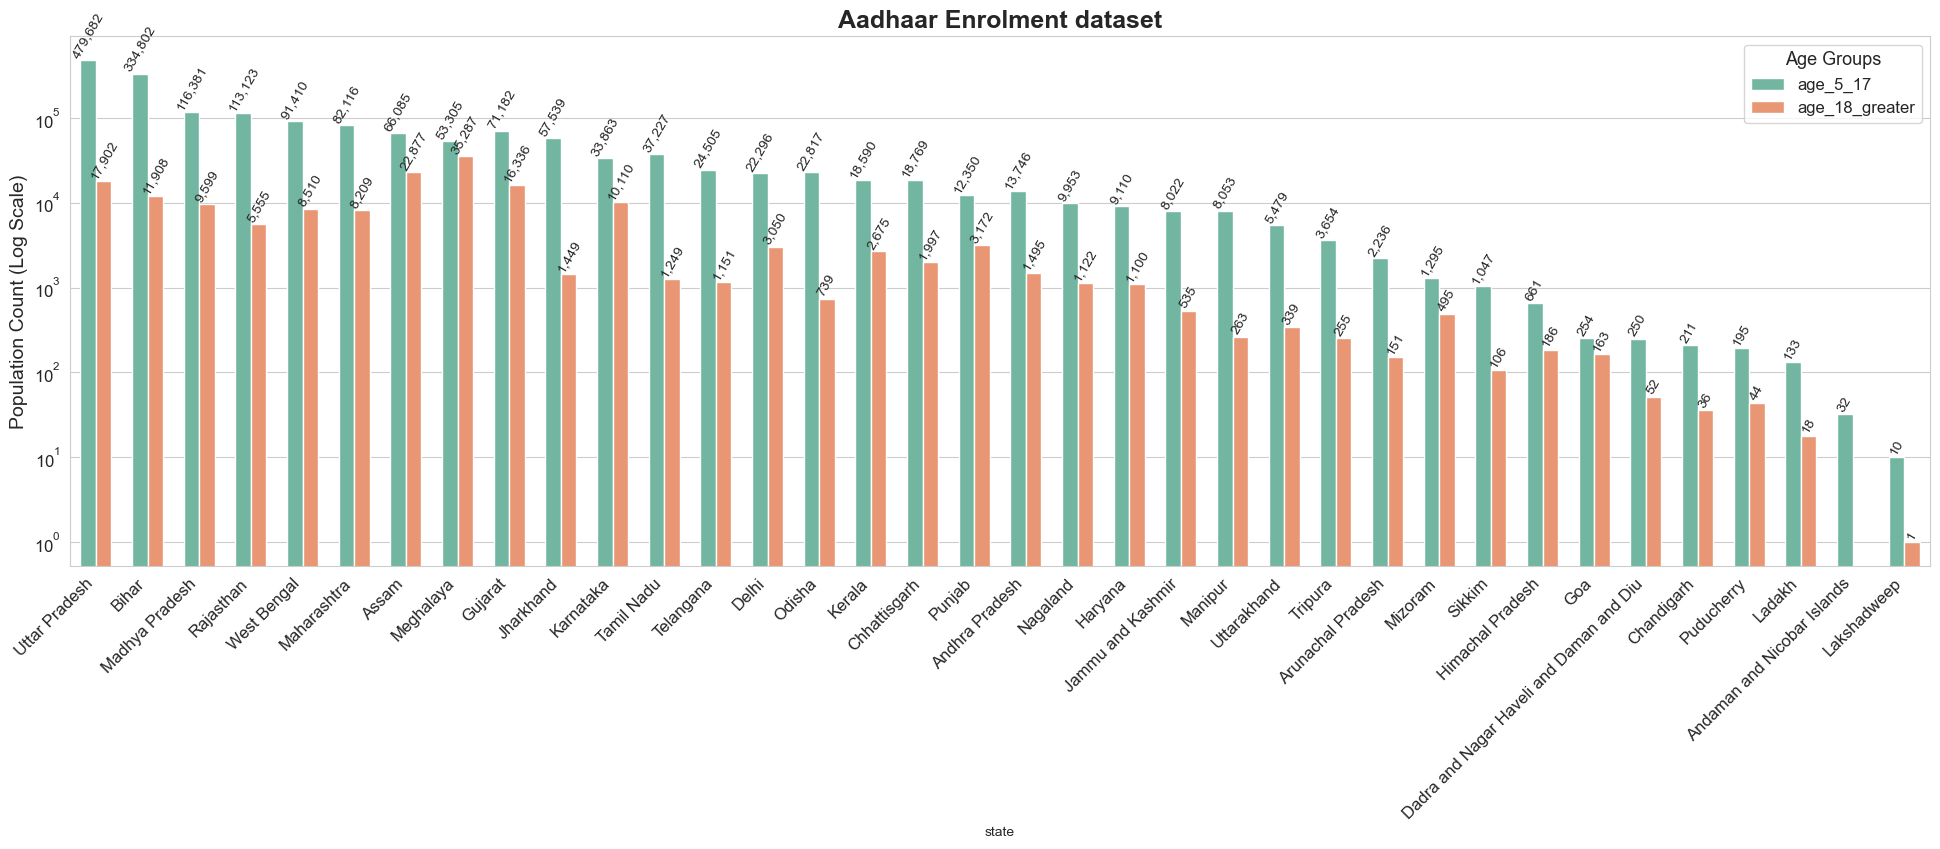

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_age_by_state.csv")
df.fillna(0, inplace=True)

df_melted = df.melt(id_vars="state", 
                    value_vars=["age_5_17", "age_18_greater"], 
                    var_name="Age Group", 
                    value_name="Population")

df["total"] = df["age_5_17"] + df["age_18_greater"]
state_order = df.sort_values("total", ascending=False)["state"].tolist()

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(24, 10))  # Wider canvas

sns.barplot(data=df_melted, 
            x="state",
            y="Population", 
            hue="Age Group", 
            order=state_order, 
            palette="Set2", 
            dodge=1.2,   
            width=0.6,   
            ax=ax)

ax.set_yscale("log")

for p in ax.patches:
    value = int(p.get_height())
    if value > 0:
        ax.annotate(f'{value:,}', 
                    (p.get_x() + p.get_width() / 2., max(p.get_height(), 1)), 
                    ha='center', va='bottom', fontsize=10, rotation=60)

ax.set_ylabel("Population Count (Log Scale)", fontsize=14)
ax.set_title("Aadhaar Enrolment dataset", fontsize=18, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title="Age Groups", fontsize=12, title_fontsize=13)
plt.subplots_adjust(bottom=0.35, top=0.88)
plt.show()
